### Random forests

Now we discuss random forests.

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# get the data from https://archive.ics.uci.edu/dataset/186/wine+quality
df_red = pd.read_csv('/home/briggsc1-erau.edu/Downloads/winequality-red.csv',sep = ';')
df_red['color'] = 1
df_white = pd.read_csv('/home/briggsc1-erau.edu/Downloads/winequality-white.csv',sep = ';')
df_white['color'] = 0
df = pd.concat([df_red,df_white])
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

In [3]:
# make a decision tree to predict quality
df.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

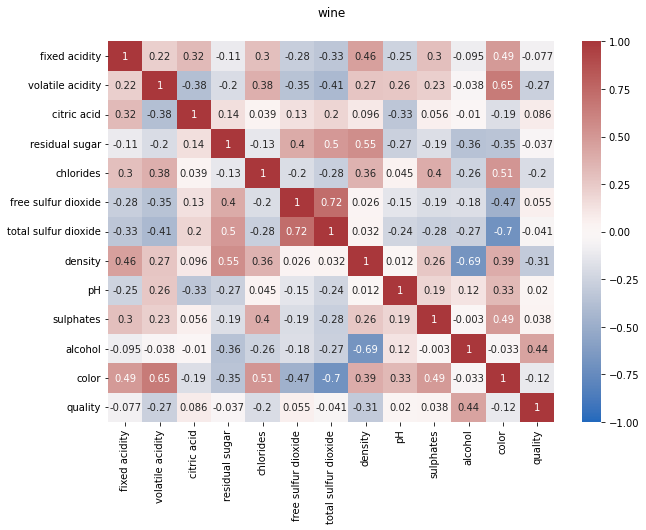

In [4]:
df= df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color', 'quality']]
fig,ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap='vlag',annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_title('wine', pad = 25);

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol        color      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     0.246114     5.818378  
std       0.160787     0.148806     1.192712     0.430779     0.873255  
min       2.720000     0.220000     8.000000     0.000000     3.000000  
25%       3.110000     0.430000     9.500000     0.000000     5.000000  
50%       3.210000     0.510000    10.300000     0.000000     6.000000  
75%       3.320000     0.600000    11.300000     0.000000     6.000000  
max       4.010000     2.000000    14.900000     1.000000     9.000000

In [6]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color']
target = ['quality']

In [7]:
x_tr,x_te,y_tr,y_te = train_test_split(df[features],df[target],
                                       test_size = 0.2)
x_tr,x_va,y_tr,y_va = train_test_split(x_tr,y_tr,
                                       test_size = 0.5)

In [8]:
tr = DecisionTreeRegressor(random_state = 0)
tr.fit(x_tr,y_tr)
print(f'Train score: {tr.score(x_tr,y_tr)}')
print(f'Val score: {tr.score(x_va,y_va)}')

Train score: 1.0
Val score: -0.1017848990951511


In [ ]:
# BTW saving off a model
from joblib import dump, load
dump(tr,'treemodel')
del(tr)
try: dir(tr)
except NameError: print('That object was deleted!')
tr =load('treemodel') # reload the model
dir(tr)

In [ ]:
# much overfit
tr.get_depth()